In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
dirpath = "/Users/thl/Developer/thesis/edge-cloud-continuum-openfaas/experiment/trigger/result/"
filename = "case4_metrics.csv"
df = pd.read_csv(f"{dirpath}/{filename}")

In [199]:
hostname_list = df["hostname"]
df_plot_metric = pd.DataFrame(columns = list(df["hostname"]) + ["User Count", "Architecture"])
arch_list = ["Centralized", "Federated", "Decentralized"]
metric = "cpu"
for arch in arch_list:
    for user_cnt in range(1, 6):
        df_plot_metric.loc[len(df_plot_metric)] = list(df[metric]) + [user_cnt, arch]

Use texture to represent host and use color to represent architecture

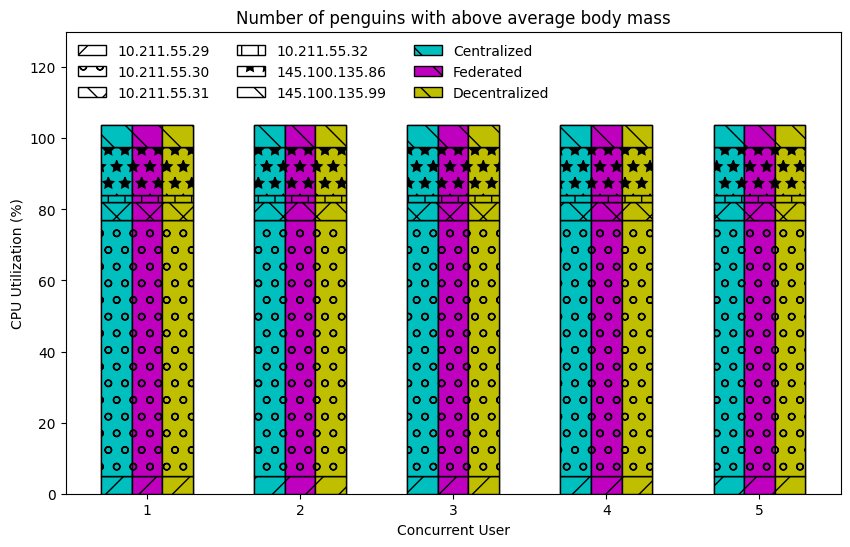

In [72]:
user_count_list = df_plot_metric["User Count"].unique()
arch_list = df_plot_metric["Architecture"].unique()



fig, ax = plt.subplots(figsize = (10, 6))
bar_width = 0.2
patterns = ["/", "o" , "x", "|", "*", "\\" ]
color = ['c', 'm', 'y']
legend = []
for i, arch in enumerate(arch_list):
    bottom = np.zeros(len(user_count_list))
    for j, hostname in enumerate(hostname_list):
        metrics = df_plot_metric[df_plot_metric["Architecture"] == arch][hostname]
        offset = bar_width * i
        plot_foo = ax.bar(
            user_count_list + offset, metrics, width = bar_width, 
            label = hostname, bottom = bottom,
            hatch=patterns[j], color = 'w', edgecolor='black'
        )
        plot = ax.bar(
            user_count_list + offset, metrics, width = bar_width, 
            label = hostname, bottom = bottom,
            hatch=patterns[j], color = color[i], edgecolor='black'
        )
        bottom += metrics
        if i == 0:
            legend.append(plot_foo[0])
        # save legend
    legend.append(plot[0])
            

        
ax.set_title("Number of penguins with above average body mass")
ax.set_xlabel('Concurrent User')
ax.set_ylabel('CPU Utilization (%)')
ax.set_xticks(user_count_list + bar_width)
ax.set_xticklabels(user_count_list)
ax.set_ylim(0, 130)
ax.legend(legend, list(hostname_list) + list(arch_list), loc='upper left', ncols=3, frameon=False)
plt.show()

use color to represent host and use tick to mark architecture

In [21]:
dirpath = "/Users/thl/Developer/thesis/edge-cloud-continuum-openfaas/experiment/trigger/result/"
filename = "case1_metrics.csv"
df = pd.read_csv(f"{dirpath}/{filename}")

In [22]:
hostname_list = df["hostname"]
user_count_list = [i for i in range(1, 5)]
df_plot_metric = pd.DataFrame(columns = list(df["hostname"]) + ["User Count", "Architecture"])
arch_list = ["Centralized", "Federated", "Decentralized"]
metric = "cpu"
for user_cnt in user_count_list:
    df = pd.read_csv(f"{dirpath}/case{user_cnt}_metrics.csv")
    for arch in arch_list:
        df_plot_metric.loc[len(df_plot_metric)] = list(df[metric]) + [user_cnt, arch]

In [23]:
df_plot_metric

,10.211.55.29,10.211.55.30,10.211.55.31,10.211.55.32,145.100.135.86,145.100.135.99,User Count,Architecture
0,3.500000,66.983333,4.333333,1.416667,15.733333,7.100000,1,Centralized
1,3.500000,66.983333,4.333333,1.416667,15.733333,7.100000,1,Federated
2,3.500000,66.983333,4.333333,1.416667,15.733333,7.100000,1,Decentralized
3,3.466667,126.800000,3.866667,1.516667,14.466667,6.183333,2,Centralized
4,3.466667,126.800000,3.866667,1.516667,14.466667,6.183333,2,Federated
5,3.466667,126.800000,3.866667,1.516667,14.466667,6.183333,2,Decentralized
6,3.683333,169.450000,3.900000,1.466667,13.766667,6.333333,3,Centralized
7,3.683333,169.450000,3.900000,1.466667,13.766667,6.333333,3,Federated
8,3.683333,169.450000,3.900000,1.466667,13.766667,6.333333,3,Decentralized
9,48.408333,145.091667,4.208333,1.275000,16.200000,12.200000,4,Centralized


In [24]:
sns.set_theme(
    context="paper",
#     style="white",
#     palette=sns.color_palette("Set1", 9, 0.9),
)

https://www.codecademy.com/article/seaborn-design-ii#

In [25]:
palette = sns.color_palette("BrBG", 6, 1)

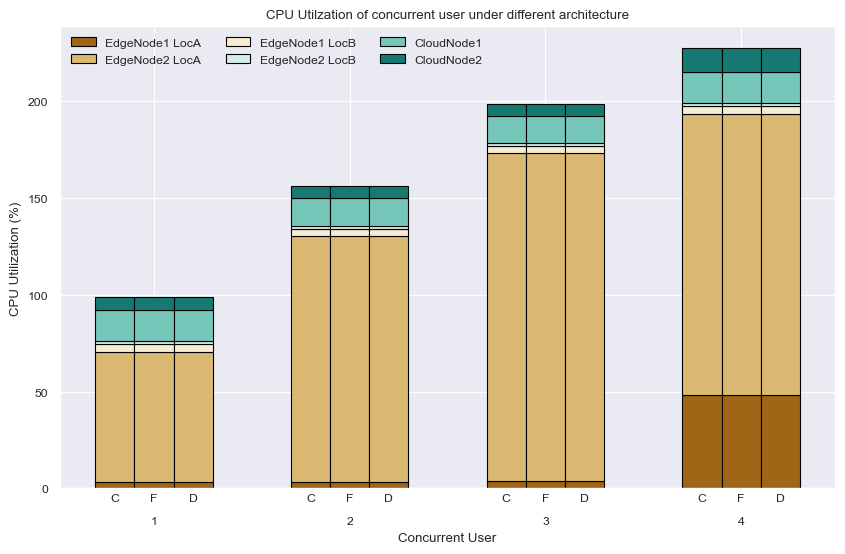

In [26]:
user_count_list = df_plot_metric["User Count"].unique()
arch_list = df_plot_metric["Architecture"].unique()


fig, ax = plt.subplots(figsize = (10, 6))
bar_width = 0.2
patterns = ["/", "o" , "x", "|", "*", "\\" ]
color = ['c', 'm', 'y', 'b', 'k', 'w']
legend = []
for i, arch in enumerate(arch_list):
    bottom = np.zeros(len(user_count_list))
    for j, hostname in enumerate(hostname_list):
        metrics = df_plot_metric[df_plot_metric["Architecture"] == arch][hostname]
        offset = bar_width * i
        plot = ax.bar(
            user_count_list + offset, metrics, width = bar_width, 
            label = hostname, bottom = bottom,
            color = palette[j], edgecolor='black'
        )
        bottom += metrics
        if i == 0:
            legend.append(plot[0])
        
ax.set_title("CPU Utilzation of concurrent user under different architecture")
ax.set_xlabel('Concurrent User')
ax.set_ylabel('CPU Utilization (%)')
# concurrent user
ax.set_xticks(user_count_list + bar_width, labels = [f"\n\n{i}" for i in user_count_list])
ax.tick_params('x', length=0)

# architecture
sec = ax.secondary_xaxis(location=0)
sec.set_xticks(
    [ i + j * bar_width for i in user_count_list for j in range(3)],
    labels = ['C', 'F', 'D'] * len(user_count_list)
)
sec.tick_params('x', length=0)

# line between user
# sec2 = ax.secondary_xaxis(location=0)
# sec2.set_xticks(
#     [ i + j for i in user_count_list for j in [-bar_width/2 , bar_width * 2 + bar_width/2]],
#     labels=[]
# )
# sec2.tick_params('x', length=30, width=1)

# ax.set_ylim(0, 130)
readable_hostname = [
    "EdgeNode1 LocA", "EdgeNode2 LocA", 
    "EdgeNode1 LocB", "EdgeNode2 LocB", 
    "CloudNode1", "CloudNode2"
]
ax.legend(legend, readable_hostname, loc='upper left', ncols=3, frameon=False)
plt.show()